# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



560

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#url=http://api.openweathermap.org/data/2.5/weather?appid=9e8ad36944a36af2b33e09daa8e352bb&units=metric&q=
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
lat= []
temp=[]
cityname=[]
humidity=[]
clouds=[]
windspeed=[]
country=[]
long=[]
date=[]
#Query URL
query_url= f"{url}appid={weather_api_key}&units={units}&q="
for city in cities[:200]:
    
    
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cityname.append(city)
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        print(city)
    except:
        print("city not found")
        pass
  


vaini
calabozo
port elizabeth
ushuaia
kapaa
salalah
hithadhoo
severo-kurilsk
lebu
bandarbeyla
hermanus
rikitea
havelock
port lincoln
avarua
new norfolk
mataura
rocha
luderitz
hobart
gamboula
tuatapere
bluff
kavieng
port-cartier
saint-pierre
kahului
arraial do cabo
cape town
city not found
acapulco
dingle
sur
touros
thompson
inhambupe
jalu
hoquiam
buala
koslan
punta arenas
chokurdakh
lagoa
skibbereen
ponta do sol
medvedevo
mar del plata
comodoro rivadavia
tasiilaq
jamestown
clyde river
city not found
coquimbo
jeremie
anadyr
city not found
kemijarvi
umm kaddadah
busselton
oron
kaeo
castro
atuona
victoria
barrow
geraldton
butaritari
hilo
albany
pevek
aripuana
teguise
city not found
chaman
joshimath
andenes
charters towers
city not found
kaitangata
yellowknife
vila velha
samarai
barquisimeto
puerto ayora
georgetown
tuktoyaktuk
norman wells
beloha
nantai
saint-paul
elko
bredasdorp
saint-philippe
bontang
vestmannaeyjar
krasnoselkup
bambous virieux
henties bay
horki
city not found
okhotsk
cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict= {
            "City": cityname,
            "Country":country,
            "Date":date,
            "Longitude":long,
            "Latitude":   lat,
            "Temperature": temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": windspeed
            
}
weather_data= pd.DataFrame(weather_dict)

weather_data.head(20)

,City,Country,Date,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,vaini,TO,1619723937,-175.2000,-21.2000,75.20,100,90,4.61
1,calabozo,VE,1619723938,-67.4293,8.9242,71.06,93,100,9.82
2,port elizabeth,ZA,1619723938,25.5701,-33.9180,57.20,94,20,12.66
3,ushuaia,AR,1619723927,-68.3000,-54.8000,42.80,56,20,3.44
4,kapaa,US,1619723939,-159.3190,22.0752,74.75,69,40,14.97
5,salalah,OM,1619723939,54.0924,17.0151,84.20,79,20,6.91
6,hithadhoo,MV,1619723939,73.0833,-0.6000,83.84,69,100,6.42
7,severo-kurilsk,RU,1619723390,156.1250,50.6789,34.93,88,44,6.46
8,lebu,CL,1619723350,-73.6500,-37.6167,61.21,76,100,5.66
9,bandarbeyla,SO,1619723940,50.8122,9.4942,83.71,75,66,10.45


In [7]:
weather_data.to_csv('citydatainfo.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

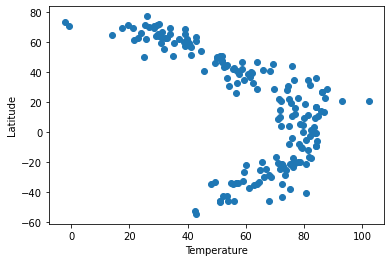

In [8]:
plt.scatter(weather_data["Temperature"],weather_data["Latitude"])
plt.xlabel("Temperature")
plt.ylabel("Latitude")

In [9]:
#There seems to be a negative correlation between high latitudes and lower temperatures 

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

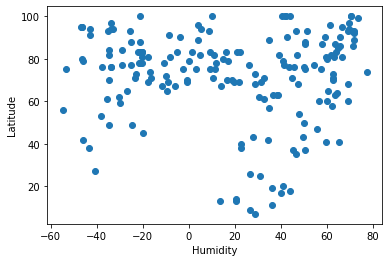

In [10]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")

In [11]:
# There doesn't seem to be a correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

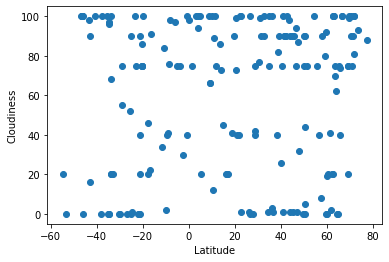

In [12]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [13]:
#Latitude doesn't have an impact on how cloudy a city is. 

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

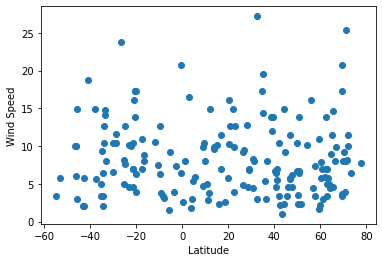

In [14]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [15]:
#The majority of wind speed is under 15 MPH

## Linear Regression

In [16]:

def linear_hemisphere (x_values,y_values,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("latitude")
    plt.ylabel(title)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

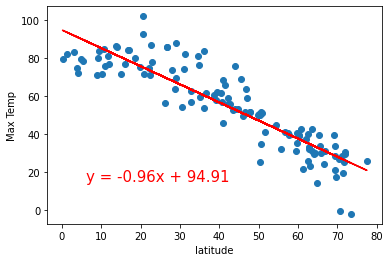

In [17]:
north_hemisphere_data= weather_data.loc[weather_data["Latitude"]>=0]
south_hemisphere_data=weather_data.loc[weather_data["Latitude"] <=0]
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Temperature"]
linear_hemisphere(x_values,y_values,"Max Temp",(6,15))

In [18]:
#There is a negative correlation with max temp and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

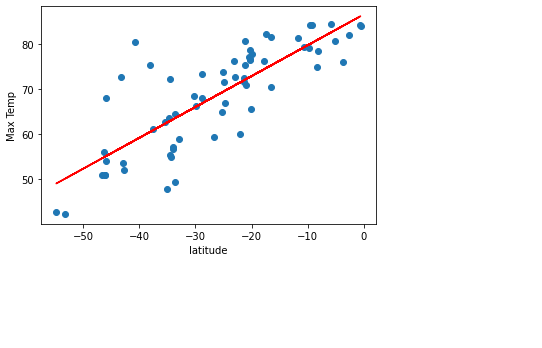

In [19]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Temperature"]
linear_hemisphere(x_values,y_values,"Max Temp", (6,15))

In [20]:
#There is a positive correlation between latitude and max temp in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

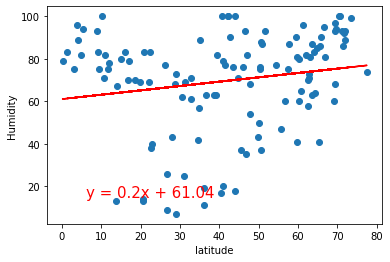

In [21]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Humidity"]
linear_hemisphere(x_values,y_values,"Humidity",(6,15))

In [22]:
#THere is no seemingly obvious correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

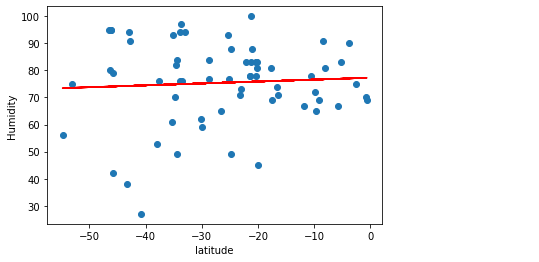

In [23]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Humidity"]
linear_hemisphere(x_values,y_values,"Humidity",(6,15))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

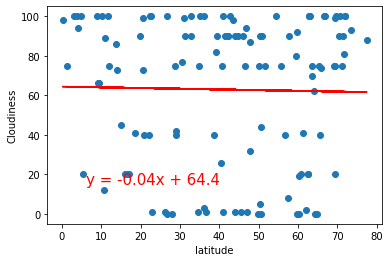

In [24]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Cloudiness"]
linear_hemisphere(x_values,y_values,"Cloudiness",(6,15))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

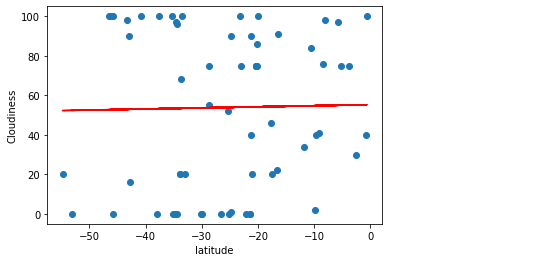

In [25]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Cloudiness"]
linear_hemisphere(x_values,y_values,"Cloudiness",(6,15))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

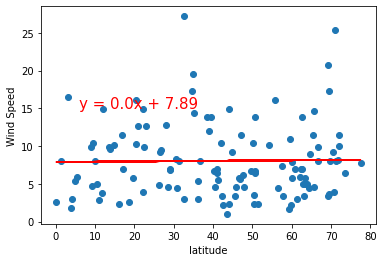

In [26]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Wind Speed"]
linear_hemisphere(x_values,y_values,"Wind Speed",(6,15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

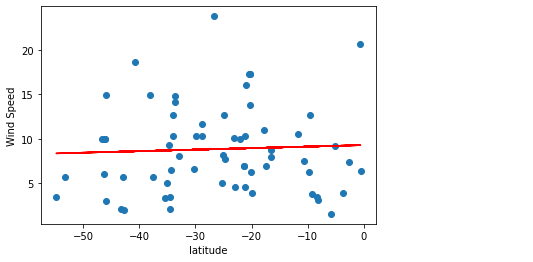

In [27]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Wind Speed"]
linear_hemisphere(x_values,y_values,"Wind Speed",(6,15))